In [3]:
import numpy as np
import pandas as pd
np.random.seed(1) # for reproducibility

In [4]:
no_samples = 1000
class_0_ratio = 0.9 
no_of_class_0 = int(no_samples*class_0_ratio)# majority class
no_of_class_1 = 100 # minority class

In [6]:
#class_0_data setup with feature1,2 and target
class_0_data = {'feature1':np.random.normal(0,1,no_of_class_0),
 'feature2':np.random.normal(0,1,no_of_class_0),
 'target':[0]*no_of_class_0}

In [8]:
class_0_df = pd.DataFrame(class_0_data)

In [9]:
class_0_df

,feature1,feature2,target
0,-0.446699,-1.307971,0
1,0.204377,1.472396,0
2,0.612233,0.074876,0
3,0.744885,-1.786935,0
4,-0.036281,0.165211,0
...,...,...,...
895,0.833679,-1.322762,0
896,2.160456,0.540306,0
897,1.998992,-0.507257,0
898,0.764041,1.128379,0


In [15]:
#class_1_data setup with feature1,2 and target
class_1_df = pd.DataFrame(
    {'feature1':np.random.normal(3,1,no_of_class_1),
 'feature2':np.random.normal(3,1,no_of_class_1),
 'target':[1]*no_of_class_1}
)

In [16]:
class_1_df

,feature1,feature2,target
0,2.599493,1.355381,1
1,2.712122,2.203338,1
2,4.328912,1.854830,1
3,1.864942,3.891121,1
4,2.417506,2.918087,1
...,...,...,...
95,3.237884,2.723859,1
96,2.207734,1.402690,1
97,1.912397,5.223821,1
98,2.416424,3.167006,1


In [18]:
df = pd.concat([class_0_df, class_1_df]).reset_index(drop=True)

In [20]:
df.target.value_counts(normalize=True)

# class 0 is at 90% and class 1 is at 10%

target
0    0.9
1    0.1
Name: proportion, dtype: float64

In [21]:
df_minority = df[df.target==1]
df_majority = df[df.target==0]

In [22]:
df_minority

,feature1,feature2,target
900,2.599493,1.355381,1
901,2.712122,2.203338,1
902,4.328912,1.854830,1
903,1.864942,3.891121,1
904,2.417506,2.918087,1
...,...,...,...
995,3.237884,2.723859,1
996,2.207734,1.402690,1
997,1.912397,5.223821,1
998,2.416424,3.167006,1


In [23]:
df_majority

,feature1,feature2,target
0,-0.446699,-1.307971,0
1,0.204377,1.472396,0
2,0.612233,0.074876,0
3,0.744885,-1.786935,0
4,-0.036281,0.165211,0
...,...,...,...
895,0.833679,-1.322762,0
896,2.160456,0.540306,0
897,1.998992,-0.507257,0
898,0.764041,1.128379,0


In [25]:
# up-sampling >> increase minority data equivalent to majority

from sklearn.utils import resample

In [26]:
df_minority_upsampled = resample(df_minority, replace=True,n_samples=len(df_majority),random_state=1) # up-sampling df_minority to df_majority

In [27]:
df_minority_upsampled

,feature1,feature2,target
937,1.669231,2.589043,1
912,2.692607,2.630897,1
972,2.946411,1.559735,1
909,3.346482,4.714655,1
975,2.268667,2.664519,1
...,...,...,...
936,2.536816,2.547475,1
998,2.416424,3.167006,1
901,2.712122,2.203338,1
932,1.641899,2.842965,1


In [29]:
df_minority_upsampled.duplicated().sum() # so 800 data points were added   

800

In [30]:
df_unsampled = pd.concat([df_majority,df_minority_upsampled])

In [31]:
df_unsampled

,feature1,feature2,target
0,-0.446699,-1.307971,0
1,0.204377,1.472396,0
2,0.612233,0.074876,0
3,0.744885,-1.786935,0
4,-0.036281,0.165211,0
...,...,...,...
936,2.536816,2.547475,1
998,2.416424,3.167006,1
901,2.712122,2.203338,1
932,1.641899,2.842965,1


In [32]:
df_unsampled.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [33]:
# undersmapling >> reduce the data points in majority class equivalent to minority class

df_majority_downsampled = resample(df_majority, replace=False,n_samples=len(df_minority),random_state=1) # down-sampling df_majority to df_minority

In [34]:
df_majority_downsampled

,feature1,feature2,target
860,0.872579,-1.537535,0
880,1.835870,-0.838450,0
874,0.146532,-0.771039,0
780,-0.859827,-2.018355,0
525,0.320971,-0.521316,0
...,...,...,...
494,2.711950,1.152007,0
255,0.522655,-0.241664,0
672,0.683356,-0.999110,0
481,-0.800787,-0.080607,0


In [36]:
df_downsampled = pd.concat([df_majority_downsampled,df_minority])

In [37]:
df_downsampled

,feature1,feature2,target
860,0.872579,-1.537535,0
880,1.835870,-0.838450,0
874,0.146532,-0.771039,0
780,-0.859827,-2.018355,0
525,0.320971,-0.521316,0
...,...,...,...
995,3.237884,2.723859,1
996,2.207734,1.402690,1
997,1.912397,5.223821,1
998,2.416424,3.167006,1


In [38]:
# SMOTE >> synthetic minority oversampling technique

In [40]:
from sklearn.datasets import make_classification

In [41]:
x, y = make_classification(n_samples=1000, n_redundant=0, n_features=2, n_clusters_per_class=1, weights=[0.90], random_state=1)

In [44]:
x,y

(array([[ 1.53682958, -1.39869399],
        [ 1.55110839,  1.81032905],
        [ 1.29361936,  1.01094607],
        ...,
        [-0.55662536, -0.15983725],
        [ 1.00499902,  0.93628981],
        [ 1.46210987,  1.14497791]]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [45]:
len(y[y==0])

894

In [46]:
len(y[y==1])

106

In [48]:
df1= pd.DataFrame(x ,columns=['f1','f2'])
df2= pd.DataFrame(y ,columns=['target'])
df_final = pd.concat([df1,df2],axis=1)

In [49]:
df_final

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [50]:
df_final.target.value_counts()

target
0    894
1    106
Name: count, dtype: int64

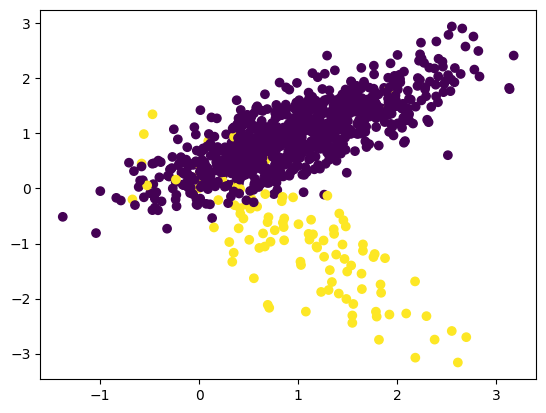

In [51]:
import matplotlib.pyplot as plt
plt.scatter(df_final['f1'],df_final['f2'],c=df_final['target'])

In [52]:
# SMOTE
from imblearn.over_sampling import SMOTE

In [53]:
oversample = SMOTE()

In [55]:
x,y = oversample.fit_resample(df_final[['f1','f2']],df_final['target'])

In [56]:
x,y

(            f1        f2
 0     1.536830 -1.398694
 1     1.551108  1.810329
 2     1.293619  1.010946
 3     1.119889  1.632518
 4     1.042356  1.121529
 ...        ...       ...
 1783  0.468467 -0.410658
 1784  1.438906 -1.270558
 1785  0.502280 -0.939486
 1786  1.607025 -2.312070
 1787  1.818012 -2.320930
 
 [1788 rows x 2 columns],
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 1783    1
 1784    1
 1785    1
 1786    1
 1787    1
 Name: target, Length: 1788, dtype: int32)

In [57]:
x.shape

(1788, 2)

In [58]:
y.shape

(1788,)

In [59]:
y[y==0]

1      0
2      0
3      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 894, dtype: int32

In [60]:
y[y==1]

0       1
8       1
14      1
17      1
20      1
       ..
1783    1
1784    1
1785    1
1786    1
1787    1
Name: target, Length: 894, dtype: int32

In [61]:
df1= pd.DataFrame(x ,columns=['f1','f2'])
df2= pd.DataFrame(y ,columns=['target'])
df_smote = pd.concat([df1,df2],axis=1)

In [62]:
df_smote

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,0.468467,-0.410658,1
1784,1.438906,-1.270558,1
1785,0.502280,-0.939486,1
1786,1.607025,-2.312070,1


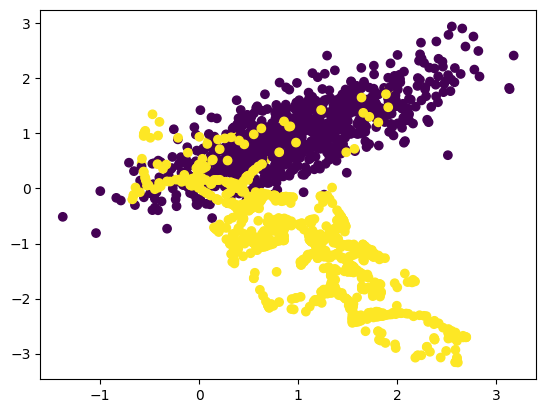

In [63]:
plt.scatter(df_smote['f1'],df_smote['f2'],c=df_smote['target'])